In [35]:
img_test = "/home/hedredo/github/oc_p9/data/images/2aaa6083689193df5ab01fe37dea1b5e.jpg"

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

2025-04-11 18:28:31.556229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744388911.600860   35843 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744388911.618442   35843 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744388911.692969   35843 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744388911.692994   35843 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744388911.692995   35843 computation_placer.cc:177] computation placer alr

In [2]:
import PIL

In [3]:
tf.version.VERSION

'2.19.0'

In [4]:
from tensorflow.keras.applications import EfficientNetB0

In [14]:
# Enregistre les paramètres du modèle
model_params = {
    'include_top': False,
    'weights': 'imagenet',
    'input_shape': (224, 224, 3)
}

# Charge le modèle EfficientNetB0
model = EfficientNetB0(**model_params)

In [15]:
from tensorflow.keras.models import Model

In [16]:
# Ajoute les dernières couches denses du modèle
x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(7, activation='softmax', name='predictions')(x)

# Crée un modèle à partir des inputs et des outputs
model = Model(inputs=model.input, outputs=predictions)

In [ ]:
# Preprocess img for prediction
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.efficientnet import decode_predictions
import numpy as np

In [36]:
img = PIL.Image.open(img_test)
img_resized = img.resize((224, 224))
img_preprocessed = preprocess_input(img_resized)
img_batch = np.expand_dims(img_preprocessed, axis=0)

In [37]:
prediction = model.predict(img_batch)
prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


(1, 7)

In [33]:
# affiche l'image
import matplotlib.pyplot as plt

In [38]:
prediction

array([[0.15153678, 0.15035602, 0.09179527, 0.30200884, 0.15699485,
        0.03626228, 0.11104602]], dtype=float32)

In [39]:
# Decode the predictions
prediction.argmax(axis=1)

array([3])

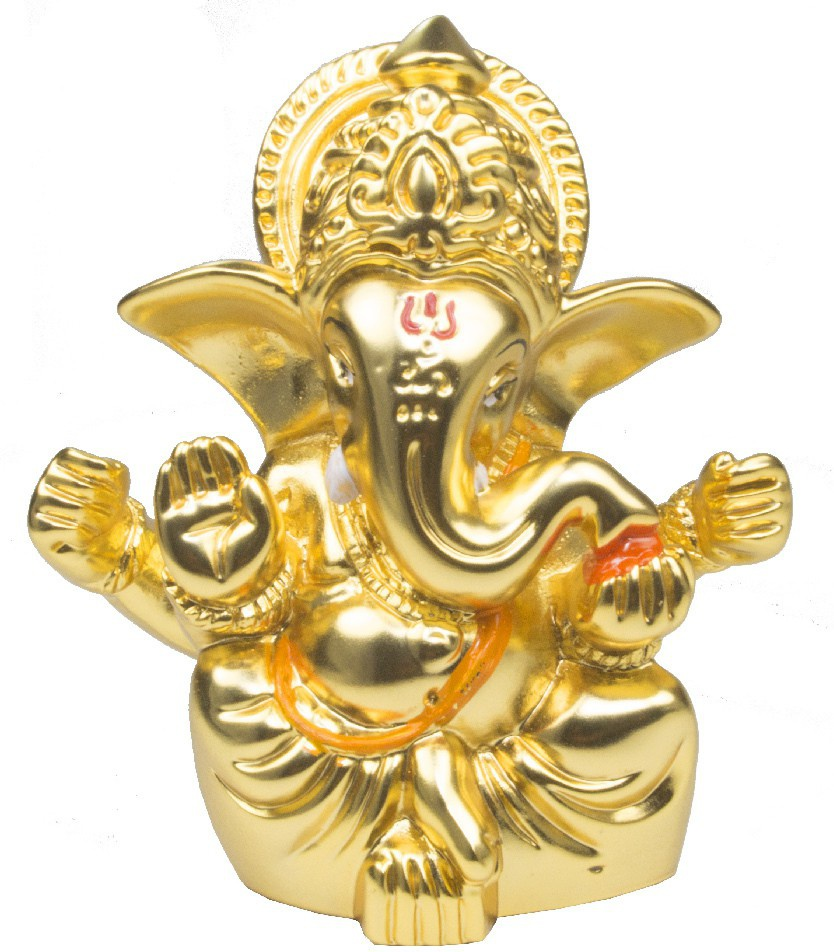

In [40]:
img.show()

In [ ]:
# Autres imports
import pandas as pd
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model

# Utilise la fonction de display de sklearn pour afficher la matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix